# Hamilton v. The Car

![title](images\lewis.jpg)

Lewis Hamilton is a six-time Forumla One World Champion and lightly regarded as the greatest Formula One Driver of all time. He won his first World Driver's Championship with McLaren in 2008 and then moved to Mercedes in 2013, where he proceeded to win his 5 remaining titles. The notebook will observe Lewis Hamilton. Was it he or his car that is to be awed for their talent? 

In [1]:
# import dependencies

import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import gmaps
from datetime import date
from api_keys import g_key
warnings.filterwarnings("ignore")

In [2]:
#create functions for calculating age, points per year, and wins per year

def calculate_age(born):
        born = datetime.datetime.strptime(born, "%m/%d/%Y").date()
        today = date.today()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

def pts_per_year(Constructor, Race_Year):
    try:
        return versus2.loc[(versus2['Constructor'] == Constructor) & (versus2['Race_Year'] == Race_Year)].groupby('Constructor')['Yearly_Points'].sum().values[0]
    except:
        return 0
def wins_per_year(Constructor, Race_Year):
    try:
        return versus2.loc[(versus2['Constructor'] == Constructor) & (versus2['Race_Year'] == Race_Year)].groupby('Constructor')['Yearly_Wins'].sum().values[0]
    except:
        return 0

def pts_per_ham(Driver_Name, Race_Year):
    try:
        return ham_data.loc[(ham_data['Constructor'] == Constructor) & (ham_data['Race_Year'] == Race_Year)].groupby('Constructor')['Yearly_Points'].sum().values[0]
    except:
        return 0
    
def wins_per_ham(Constructor, Race_Year):
    try:
        return ham_data.loc[(ham_data['Constructor'] == Constructor) & (ham_data['Race_Year'] == Race_Year)].groupby('Constructor')['Yearly_Wins'].sum().values[0]
    except:
        return 0

In [3]:
#read in the data
# read in CSVs

df_races  = pd.read_csv('Resources/races.csv')
df_drivers = pd.read_csv('Resources/drivers.csv',encoding='latin1')
df_constructors = pd.read_csv('Resources/constructors.csv',encoding='latin-1')
df_results = pd.read_csv('Resources/results.csv',encoding='latin-1')

#create a clean data frame (need a driver name column & age - don't calcuate until the end)

#marry the results csv to the driver csv
df_drivers['fullName'] = df_drivers['forename'] +" "+ df_drivers['surname']
results = pd.merge(df_results,df_drivers, on='driverId',how='inner')

#keep only the columns needed from the new data frame and join it to the race data
df1 = results[['raceId','driverId','constructorId','positionOrder','points','dob','nationality','fullName']].copy()
race_data = pd.merge(df1,df_races, on='raceId',how='inner')

#keep only the columns needed from the new data frame and join it to the constructor data
df2 = race_data[['raceId','driverId','constructorId','positionOrder','points','dob','nationality','fullName','year','name']].copy()
constructor_data = pd.merge(df2,df_constructors, on='constructorId',how='inner')


#keep only the columns needed from the new data frame
df3 = constructor_data [['positionOrder','points','dob','nationality_x','fullName','year','name_x','name_y','nationality_y']].copy()

#rename columns - make it pretty
df4 = df3.rename(columns={'positionOrder': 'Position', 
                          'points': 'Points', 
                          'dob' : 'DOB', 
                          'nationality_x':'Driver_Nationality',
                          'fullName':'Driver_Name',
                          'year':'Race_Year',
                          'name_x':'Race_Name',
                          'name_y':'Constructor',
                          'nationality_y':'Constructor_Nationality'})

#filter down to the year 2007 and calculate age
clean_data = df4[df4["Race_Year"] >=2007 ]
clean_data['Age'] = clean_data['DOB'].apply(calculate_age)

#read in the final clean data set        
clean_data.head()

,Position,Points,DOB,Driver_Nationality,Driver_Name,Race_Year,Race_Name,Constructor,Constructor_Nationality,Age
0,1,10.0,1/7/1985,British,Lewis Hamilton,2008,Australian Grand Prix,McLaren,British,35
1,5,4.0,10/19/1981,Finnish,Heikki Kovalainen,2008,Australian Grand Prix,McLaren,British,39
2,5,4.0,1/7/1985,British,Lewis Hamilton,2008,Malaysian Grand Prix,McLaren,British,35
3,3,6.0,10/19/1981,Finnish,Heikki Kovalainen,2008,Malaysian Grand Prix,McLaren,British,39
4,13,0.0,1/7/1985,British,Lewis Hamilton,2008,Bahrain Grand Prix,McLaren,British,35


In [4]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 11082
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Position                 5619 non-null   int64  
 1   Points                   5619 non-null   float64
 2   DOB                      5619 non-null   object 
 3   Driver_Nationality       5619 non-null   object 
 4   Driver_Name              5619 non-null   object 
 5   Race_Year                5619 non-null   int64  
 6   Race_Name                5619 non-null   object 
 7   Constructor              5619 non-null   object 
 8   Constructor_Nationality  5619 non-null   object 
 9   Age                      5619 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 482.9+ KB


In [5]:
clean_data.shape

(5619, 10)

In [6]:
clean_data.describe()

,Position,Points,Race_Year,Age
count,5619.000000,5619.000000,5619.000000,5619.000000
mean,11.285282,4.155633,2013.399537,34.449902
std,6.293460,6.602785,3.854603,6.528883
min,1.000000,0.000000,2007.000000,21.000000
25%,6.000000,0.000000,2010.000000,30.000000
50%,11.000000,0.000000,2013.000000,34.000000
75%,17.000000,6.000000,2017.000000,39.000000
max,24.000000,50.000000,2020.000000,51.000000


# Data by Nationality

![title](images\nationality.jpg)

Deciding how to observe Hamilton was difficult. I decided to start by nationality. From a nationality standpoint, who are the best drivers? Who are the best Constructors? What Nation is the best? How does Lewis Hamilton's success contribute to Nationality Data?

From the analysis below, it is clear that Germany is the leader. Germany is home turf for most of the world's Grands Prix. German Constructors lead in total points and in total wins and while it is British Drivers that lead in Points and Wins, that is because Lewis Hamilton is a British driver, driving a German car.

While the data would suggest that driving a car from a German Constructor like Mercedes would make a driver more successful, Mercedes had not won a world title since 1998. So what we really need to look at, is how successful Mercedes became over time, particularly when Lewis Hamilton joined the team in 2013.

In [7]:
#create dataframes for nationality

#driver nationality
driver_nationality= clean_data
driver_nationality['DriverN_TTL_PTS']=driver_nationality.groupby(by='Driver_Name')['Points'].transform('sum').sort_values()
driver_nationality = driver_nationality.loc[clean_data['Position']==1]
driver_nationality['DriverN_TTL_Wins']=driver_nationality.groupby(by='Driver_Name')['Position'].transform('count').sort_values()
d_nation = driver_nationality.drop_duplicates(subset=['Driver_Name'])
d_nation['fig_name'] = d_nation['Driver_Name'] +" ("+ d_nation['Driver_Nationality']+")"


driver_nation = d_nation [['Driver_Name','Driver_Nationality','DriverN_TTL_PTS','DriverN_TTL_Wins','fig_name','Race_Year']].copy()
driver_nation = driver_nation.sort_values(by='DriverN_TTL_Wins', ascending=False)


driver_nation


,Driver_Name,Driver_Nationality,DriverN_TTL_PTS,DriverN_TTL_Wins,fig_name,Race_Year
0,Lewis Hamilton,British,3687.0,92,Lewis Hamilton (British),2008
4164,Sebastian Vettel,German,3003.0,53,Sebastian Vettel (German),2008
8602,Nico Rosberg,German,1590.5,23,Nico Rosberg (German),2012
39,Fernando Alonso,Spanish,1518.0,17,Fernando Alonso (Spanish),2007
107,Jenson Button,British,1012.0,14,Jenson Button (British),2010
4675,Kimi RÃ¤ikkÃ¶nen,Finnish,1515.0,12,Kimi RÃ¤ikkÃ¶nen (Finnish),2008
7366,Mark Webber,Australian,978.5,9,Mark Webber (Australian),2009
8801,Valtteri Bottas,Finnish,1468.0,9,Valtteri Bottas (Finnish),2017
7623,Max Verstappen,Dutch,1110.0,9,Max Verstappen (Dutch),2016
4678,Felipe Massa,Brazilian,1060.0,9,Felipe Massa (Brazilian),2008


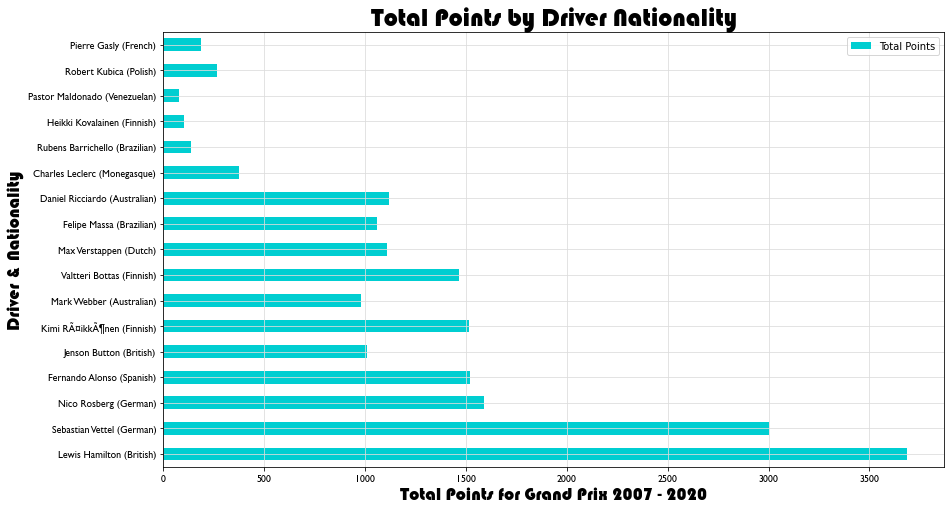

In [8]:
fig1 = driver_nation.plot.barh(x='fig_name', y='DriverN_TTL_PTS', figsize=(14, 8),color='darkturquoise')

plt.title("Total Points by Driver Nationality",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Driver & Nationality',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Total Points for Grand Prix 2007 - 2020',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')


plt.savefig('Visualizations\driver_pts.png')

In [9]:
#constructor nationality
constructor_nationality= clean_data
constructor_nationality['ConN_TTL_PTS']=constructor_nationality.groupby(by='Constructor')['Points'].transform('sum').sort_values()
constructor_nationality = constructor_nationality.loc[clean_data['Position']==1]
constructor_nationality['ConN_TTL_Wins']=constructor_nationality.groupby(by='Constructor')['Position'].transform('count').sort_values()
c_nation = constructor_nationality.drop_duplicates(subset=['Constructor'])
c_nation['fig_name'] = c_nation['Constructor'] +" ("+ c_nation['Constructor_Nationality']+")"


contract_nation = c_nation [['Constructor','Constructor_Nationality','ConN_TTL_PTS','ConN_TTL_Wins','fig_name','Race_Year']].copy()
contract_nation = contract_nation.sort_values(by='ConN_TTL_Wins', ascending=False)

contract_nation

,Constructor,Constructor_Nationality,ConN_TTL_PTS,ConN_TTL_Wins,fig_name,Race_Year
8602,Mercedes,German,5547.0,103,Mercedes (German),2012
7355,Red Bull,Austrian,4900.5,63,Red Bull (Austrian),2009
4675,Ferrari,Italian,4703.0,46,Ferrari (Italian),2008
0,McLaren,British,2536.0,34,McLaren (British),2008
8488,Brawn,British,172.0,8,Brawn (British),2009
3388,Renault,French,791.0,2,Renault (French),2008
10187,Lotus F1,British,706.0,2,Lotus F1 (British),2012
1746,BMW Sauber,German,272.0,1,BMW Sauber (German),2008
2062,Williams,British,1054.5,1,Williams (British),2012
4164,Toro Rosso,Italian,499.0,1,Toro Rosso (Italian),2008


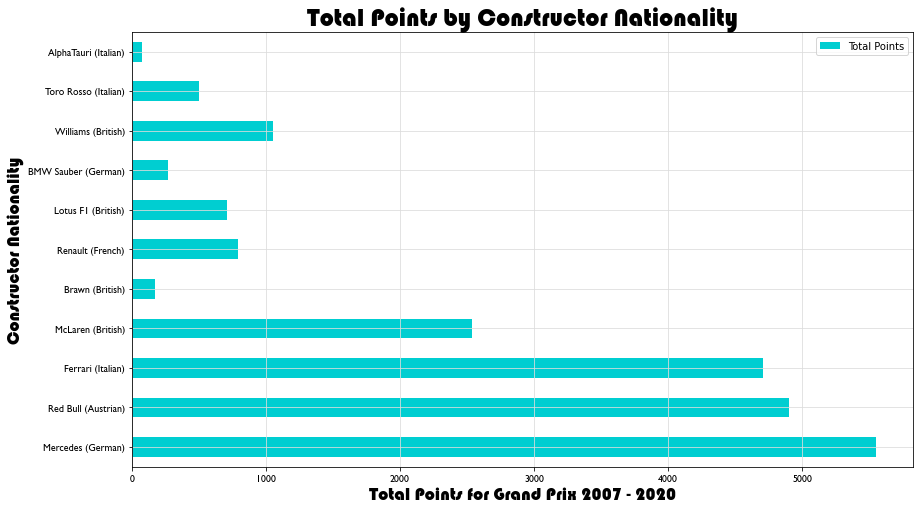

In [10]:
fig2 = contract_nation.plot.barh(x='fig_name', y='ConN_TTL_PTS', figsize=(14, 8),color='darkturquoise')

plt.title("Total Points by Constructor Nationality",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Constructor Nationality',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Total Points for Grand Prix 2007 - 2020',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.savefig('Visualizations\constructor_pts.png')

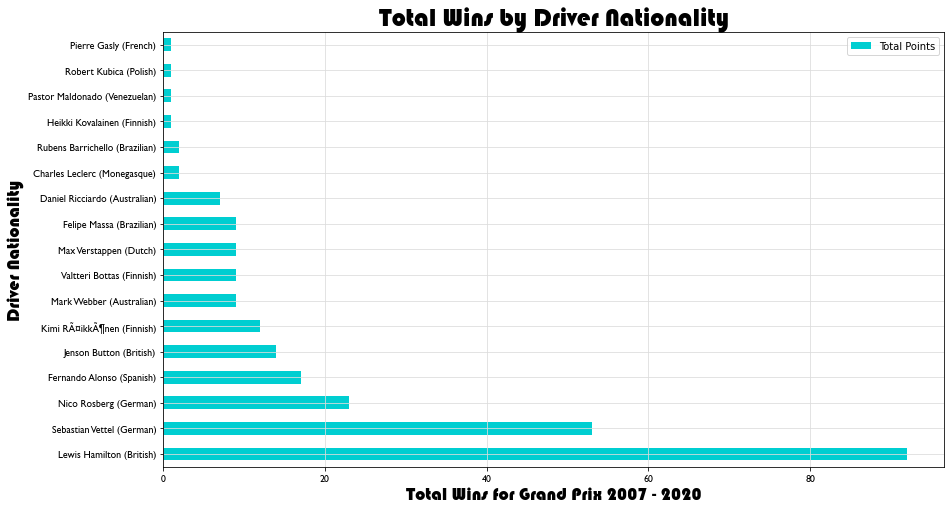

In [11]:
fig3 = driver_nation.plot.barh(x='fig_name', y='DriverN_TTL_Wins', figsize=(14, 8),color='darkturquoise')

plt.title("Total Wins by Driver Nationality",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Driver Nationality',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Total Wins for Grand Prix 2007 - 2020',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.savefig('Visualizations\driver_wins.png')

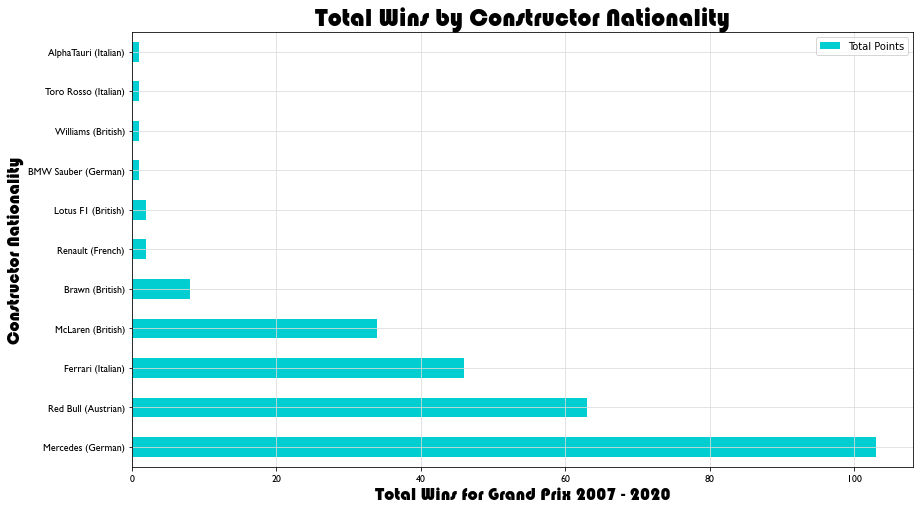

In [12]:
fig4 = contract_nation.plot.barh(x='fig_name', y='ConN_TTL_Wins', figsize=(14, 8),color='darkturquoise')

plt.title("Total Wins by Constructor Nationality",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Constructor Nationality',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Total Wins for Grand Prix 2007 - 2020',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.savefig('Visualizations\constructor_wins.png')

In [13]:
#read in race location data to see where the majority of races occur
race_loc = pd.read_csv("Resources/circuits.csv")

# configure heat map
city_locations = race_loc[["lat", "lng",]]
gmaps.configure(api_key=g_key)
fig = gmaps.figure(center=(48.0, 6.0), zoom_level=4)

heat_layer = gmaps.heatmap_layer(city_locations,
                                 dissipating=False,
                                 point_radius=3)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Is it Hamilton or Mercedes?

![title](images\hammy.jpg)

As previously observed, the data suggests driving a German car would make you a better driver. However, when we break the data down and hone in on performance over time. There is a clear shift in German wins and points when Lewis Hamilton makes his switch from McLaren to Mercedes. The data demonstrates that while all the data mining in the world can be done on the engineering of a car, it is the driver that makes the sport. Moreover, it is Lewis Hamilton that makes the sport.

In [14]:
#create a dataframe to analyze Mercedes performance over time

hm = clean_data
hm = hm.loc[hm['Position']==1]

hm['fig_name'] = hm['Driver_Name'] +" ("+ hm ['Driver_Nationality']+")"
mercedes = hm[hm['Constructor']=='Mercedes']
mercedes['Yearly_Points']=mercedes.groupby(by='Race_Year')['Points'].transform('sum').sort_values()
mercedes['Yearly_Wins']=mercedes.groupby(by='Race_Year')['Position'].transform('count').sort_values()

mdf = mercedes[['Race_Year','Yearly_Points','Yearly_Wins','Constructor','fig_name']].copy()

mdf



,Race_Year,Yearly_Points,Yearly_Wins,Constructor,fig_name
8602,2012,25.0,1,Mercedes,Nico Rosberg (German)
8649,2013,75.0,3,Mercedes,Nico Rosberg (German)
8653,2013,75.0,3,Mercedes,Nico Rosberg (German)
8656,2013,75.0,3,Mercedes,Lewis Hamilton (British)
8677,2014,425.0,16,Mercedes,Nico Rosberg (German)
...,...,...,...,...,...
8930,2020,254.0,10,Mercedes,Lewis Hamilton (British)
8934,2020,254.0,10,Mercedes,Lewis Hamilton (British)
8937,2020,254.0,10,Mercedes,Valtteri Bottas (Finnish)
8938,2020,254.0,10,Mercedes,Lewis Hamilton (British)


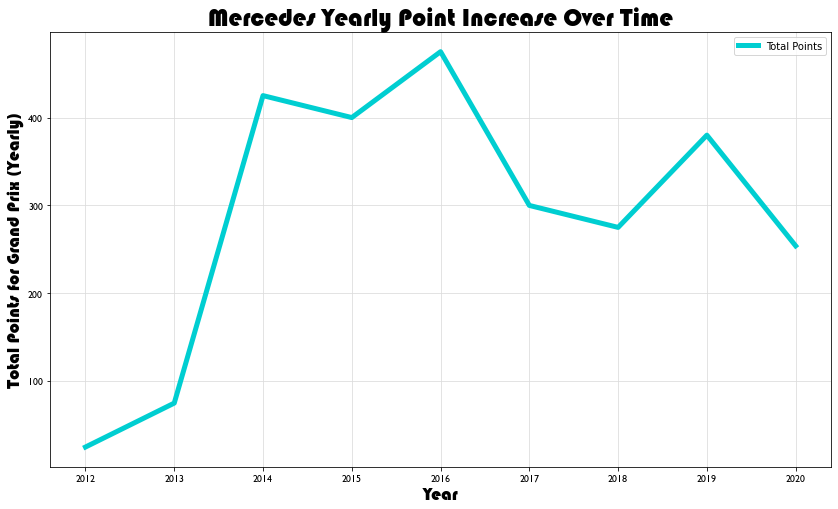

In [15]:
fig5 = mdf.plot(x='Race_Year',y='Yearly_Points', figsize=(14, 8),color='darkturquoise',linewidth=5,)

plt.title("Mercedes Yearly Point Increase Over Time",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Total Points for Grand Prix (Yearly)',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Year',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.savefig('Visualizations\merecdes_pts_timeline.png')

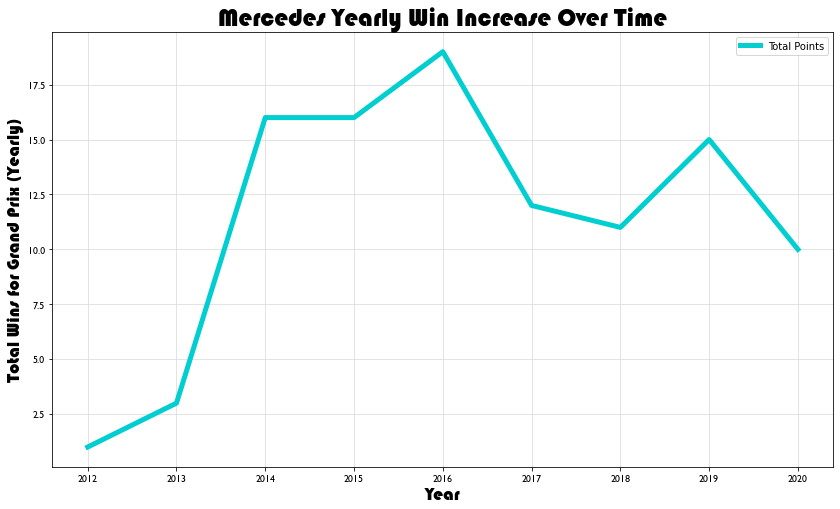

In [16]:
fig6 = mdf.plot(x='Race_Year',y='Yearly_Wins', figsize=(14, 8),color='darkturquoise',linewidth=5,)

plt.title("Mercedes Yearly Win Increase Over Time",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Total Wins for Grand Prix (Yearly)',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Year',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.savefig('Visualizations\merecdes_wins_timeline.png')

In [17]:
#create a dataframe to analyze McLaren performance over time

mclaren = hm[hm['Constructor']=='McLaren']
mclaren['Yearly_Points']=mclaren.groupby(by='Race_Year')['Points'].transform('sum').sort_values()
mclaren['Yearly_Wins']=mclaren.groupby(by='Race_Year')['Position'].transform('count').sort_values()

mcdf = mclaren[['Race_Year','Yearly_Points','Yearly_Wins','Constructor','fig_name']].copy()

mcdf.head()



,Race_Year,Yearly_Points,Yearly_Wins,Constructor,fig_name
0,2008,60.0,6,McLaren,Lewis Hamilton (British)
10,2008,60.0,6,McLaren,Lewis Hamilton (British)
16,2008,60.0,6,McLaren,Lewis Hamilton (British)
18,2008,60.0,6,McLaren,Lewis Hamilton (British)
21,2008,60.0,6,McLaren,Heikki Kovalainen (Finnish)


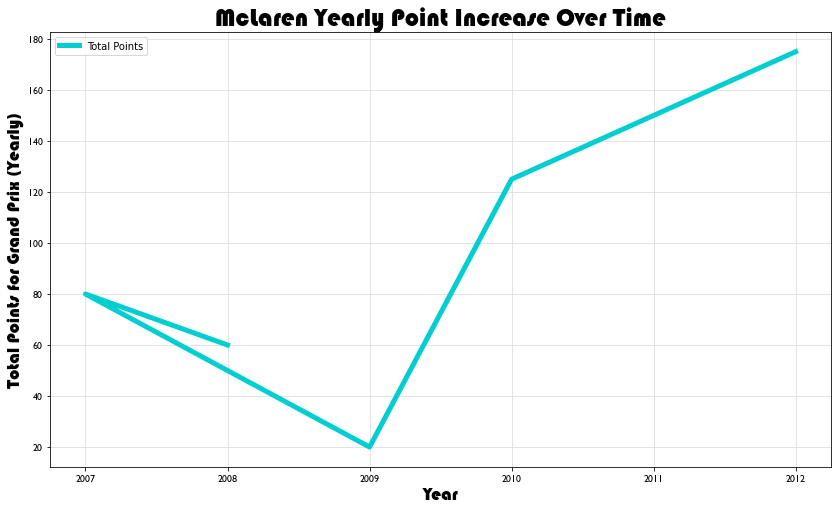

In [18]:
fig7 = mcdf.plot(x='Race_Year',y='Yearly_Points', figsize=(14, 8),color='darkturquoise',linewidth=5,)

plt.title("McLaren Yearly Point Increase Over Time",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Total Points for Grand Prix (Yearly)',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Year',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.savefig('Visualizations\mclaren_pts_timeline.png')

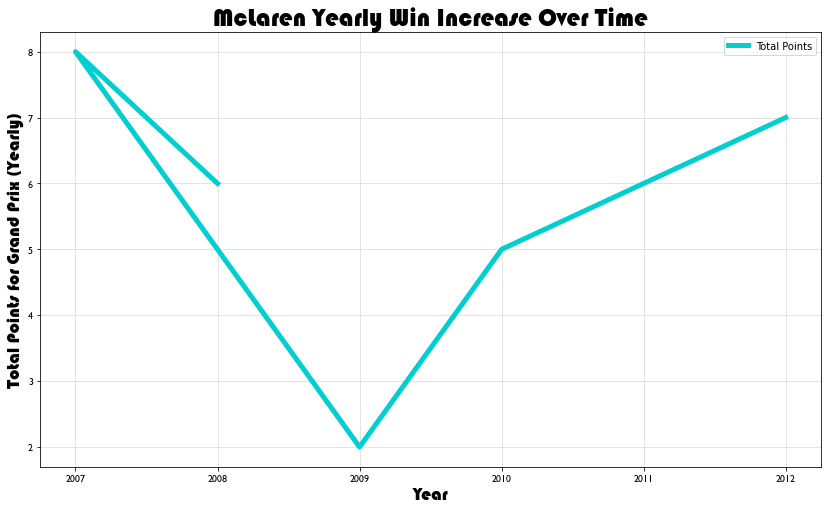

In [19]:
fig7 = mcdf.plot(x='Race_Year',y='Yearly_Wins', figsize=(14, 8),color='darkturquoise',linewidth=5,)

plt.title("McLaren Yearly Win Increase Over Time",fontsize=25,fontname='bauhaus 93')
plt.ylabel('Total Points for Grand Prix (Yearly)',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Year',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.legend(['Total Points'])
plt.grid(color='gainsboro')

plt.savefig('Visualizations\mclaren_wins_timeline.png')

In [20]:
#create a dataframe to analyze McLaren v. Mercedes performance over time

timeline = hm.query('Constructor== ["McLaren", "Mercedes"]')

timeline['Yearly_Points']=timeline.groupby(by='Race_Year')['Points'].transform('sum').sort_values()
timeline['Yearly_Wins']=timeline.groupby(by='Race_Year')['Position'].transform('count').sort_values()

versus = timeline[['Race_Year','Yearly_Points','Yearly_Wins','Constructor']].copy()


versus2 = pd.DataFrame.drop_duplicates(versus)

In [21]:
versus2

,Race_Year,Yearly_Points,Yearly_Wins,Constructor
0,2008,60.0,6,McLaren
39,2007,80.0,8,McLaren
88,2009,20.0,2,McLaren
107,2010,125.0,5,McLaren
146,2011,150.0,6,McLaren
181,2012,200.0,8,McLaren
8602,2012,200.0,8,Mercedes
8649,2013,75.0,3,Mercedes
8677,2014,425.0,16,Mercedes
8714,2015,400.0,16,Mercedes


In [22]:
#create a dataframe to analyze McLaren v. Mercedes performance over time

ham = clean_data
ham = ham.loc[ham['Position']==1]



hamilton = ham.query('Driver_Name== ["Lewis Hamilton"]')

hamilton['Yearly_Points']=hamilton.groupby(by='Race_Year')['Points'].transform('sum').sort_values()
hamilton['Yearly_Wins']=hamilton.groupby(by='Race_Year')['Position'].transform('count').sort_values()

ham_d = hamilton[['Race_Year','Yearly_Points','Yearly_Wins','Driver_Name','Constructor']].copy()

ham_data = ham_d.drop_duplicates(subset=['Race_Year'])

ham_data

,Race_Year,Yearly_Points,Yearly_Wins,Driver_Name,Constructor
0,2008,50.0,5,Lewis Hamilton,McLaren
46,2007,40.0,4,Lewis Hamilton,McLaren
88,2009,20.0,2,Lewis Hamilton,McLaren
116,2010,75.0,3,Lewis Hamilton,McLaren
146,2011,75.0,3,Lewis Hamilton,McLaren
192,2012,100.0,4,Lewis Hamilton,McLaren
8656,2013,25.0,1,Lewis Hamilton,Mercedes
8678,2014,300.0,11,Lewis Hamilton,Mercedes
8714,2015,250.0,10,Lewis Hamilton,Mercedes
8762,2016,250.0,10,Lewis Hamilton,Mercedes


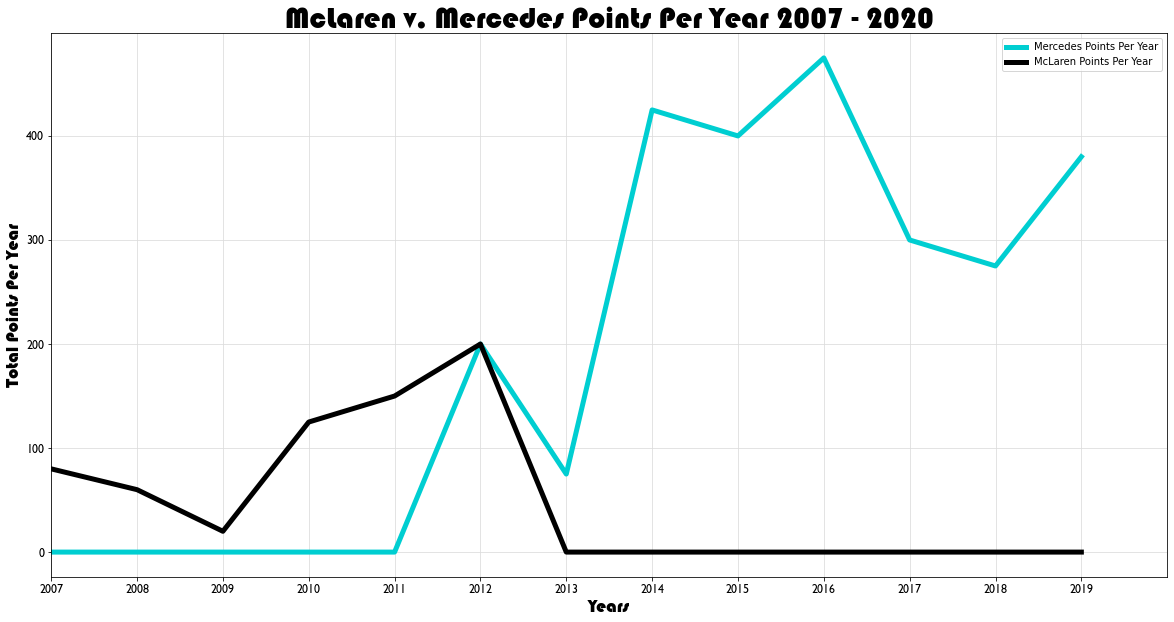

In [23]:
mercedes_pts = []
mclaren_pts = []

for year in range(2007,2020):
    mercedes_pts.append(pts_per_year('Mercedes',year))
    mclaren_pts.append(pts_per_year('McLaren',year))

x = range(2007,2020)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

line1, = ax.plot(x, mercedes_pts, label='Mercedes Points Per Year', color='darkturquoise',linewidth=5,)
line2, = ax.plot(x, mclaren_pts, label='McLaren Points Per Year' ,linewidth=5, color='black')

plt.title("McLaren v. Mercedes Points Per Year 2007 - 2020",fontsize=30, fontname='bauhaus 93')
plt.ylabel('Total Points Per Year',fontsize = 18, fontname='bauhaus 93')
plt.xlabel('Years',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.grid(color='gainsboro')
plt.xlim(2007, 2020)
plt.xticks(x)
ax.legend()

plt.savefig('Visualizations\\versus_pts.png')

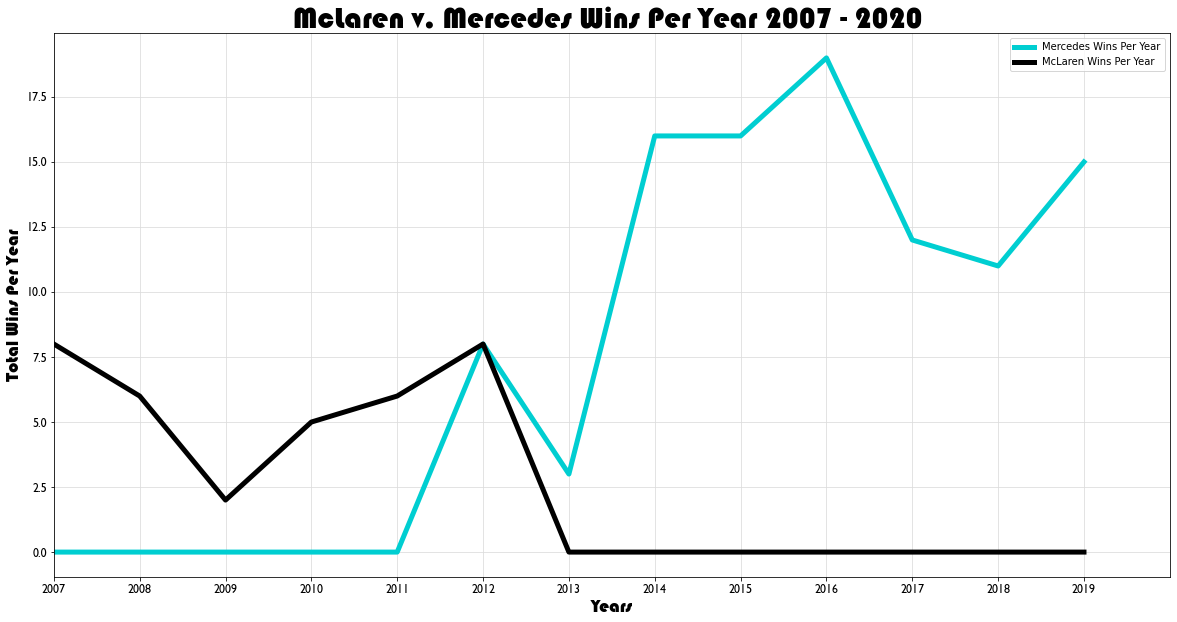

In [24]:
mercedes_wins = []
mclaren_wins = []

for year in range(2007,2020):
    mercedes_wins.append(wins_per_year('Mercedes',year))
    mclaren_wins.append(wins_per_year('McLaren',year))


x = range(2007,2020)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

line1, = ax.plot(x, mercedes_wins, label='Mercedes Wins Per Year', color='darkturquoise',linewidth=5,)
line2, = ax.plot(x, mclaren_wins, label='McLaren Wins Per Year' ,linewidth=5, color='black')


plt.title("McLaren v. Mercedes Wins Per Year 2007 - 2020 ",fontsize=30,fontname='bauhaus 93')
plt.ylabel('Total Wins Per Year',fontsize = 18,fontname='bauhaus 93')
plt.xlabel('Years',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.grid(color='gainsboro')
plt.xlim(2007, 2020)
plt.xticks(x)
ax.legend()

plt.savefig('Visualizations\\versus_wins.png')

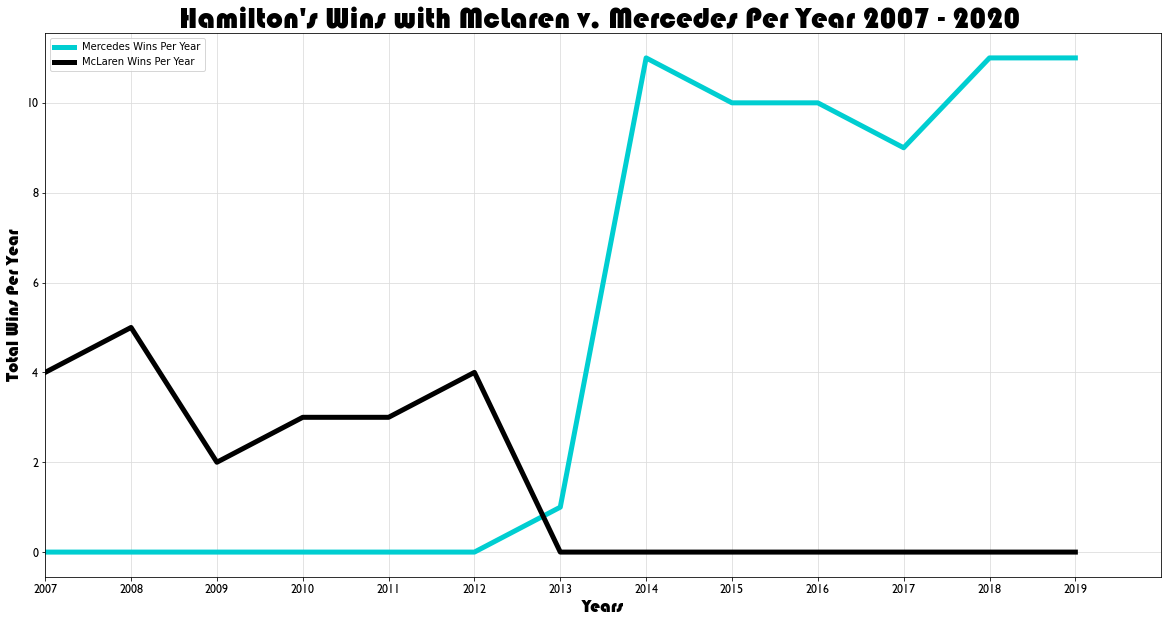

In [25]:
mercedes_ham = []
mclaren_ham = []

for year in range(2007,2020):
    mercedes_ham.append(wins_per_ham('Mercedes',year))
    mclaren_ham.append(wins_per_ham('McLaren',year))


x = range(2007,2020)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

line1, = ax.plot(x, mercedes_ham, label='Mercedes Wins Per Year', color='darkturquoise',linewidth=5,)
line2, = ax.plot(x, mclaren_ham, label='McLaren Wins Per Year' ,linewidth=5, color='black')


plt.title("Hamilton's Wins with McLaren v. Mercedes Per Year 2007 - 2020 ",fontsize=30,fontname='bauhaus 93')
plt.ylabel('Total Wins Per Year',fontsize = 18,fontname='bauhaus 93')
plt.xlabel('Years',fontsize = 18,fontname='bauhaus 93')
plt.yticks(fontname = "gill sans mt")
plt.xticks(fontname = "gill sans mt")
plt.grid(color='gainsboro')
plt.xlim(2007, 2020)
plt.xticks(x)
ax.legend()

plt.savefig('Visualizations\\hamilton_wins.png')